In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
selected_rows = df_train[df_train['Age'].isnull()]
print(selected_rows)
row_num = [i for i in (selected_rows.index)]
print(len(row_num))

df_train['Age'] = df_train['Age'].fillna(0)
print(row_num)


selected_rows_Train = df_test[df_test['Age'].isnull()]
print(selected_rows_Train)
row_num = [i for i in (selected_rows_Train.index)]
print(len(row_num))
df_test['Age'] = df_test['Age'].fillna(0)

selected_rows_Trai = df_test[df_test['Fare'].isnull()]
print(selected_rows_Trai)
row_num = [i for i in (selected_rows_Trai.index)]
print(len(row_num))
df_test['Fare'] = df_test['Fare'].fillna(0)

     PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Tic

In [5]:
df_train['Fare'] = df_train['Fare'].astype(int)
df_train['Age'] = df_train['Age'].astype(int)
df_train.head()


df_test['Fare'] = df_test['Fare'].astype(int)
df_test['Age'] = df_test['Age'].astype(int)


In [6]:
from sklearn import preprocessing

le_Gender = preprocessing.LabelEncoder()
le_Gender.fit(['male', 'female'])
df_train.iloc[:,4] = le_Gender.transform(df_train.iloc[:,4])


le_Gender = preprocessing.LabelEncoder()
le_Gender.fit(['male', 'female'])
df_test.iloc[:,3] = le_Gender.transform(df_test.iloc[:,3])



print(df_train.iloc[:,1])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


array([[<AxesSubplot:title={'center':'Survived'}>]], dtype=object)

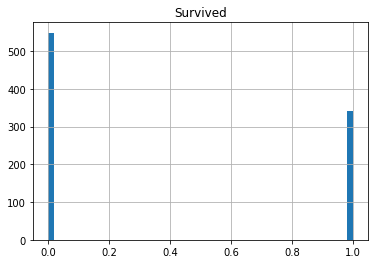

In [7]:
df_train.hist(column='Survived', bins=50)

In [8]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
x = df_train[['Sex', 'Pclass', 'Parch', 'Fare']].values
y = df_train[['Survived']].values

x_test = df_test[['Sex', 'Pclass', 'Parch', 'Fare']].values
#y_test = df_test[['Survived']].values

print(y)
print(x)

[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]


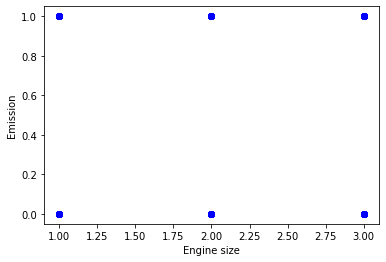

In [10]:
plt.scatter(df_train.Pclass, df_train.Survived,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

array([[<AxesSubplot:title={'center':'Pclass'}>]], dtype=object)

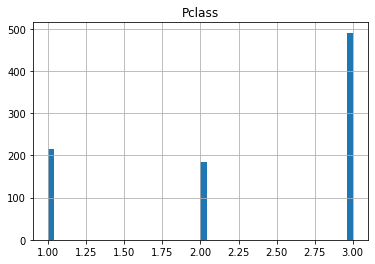

In [11]:
df_train.hist(column='Pclass', bins=50)

In [12]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x, y)

/mnt/home/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [13]:
yhat = clf.predict(x)
yhat1 = clf.predict(x_test)
print(yhat [0:10])
print(yhat1 [0:10])

[0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


              precision    recall  f1-score   support

           0       0.67      0.92      0.78       549
           1       0.70      0.29      0.41       342

    accuracy                           0.68       891
   macro avg       0.68      0.60      0.59       891
weighted avg       0.68      0.68      0.64       891

Confusion matrix, without normalization
[[506  43]
 [244  98]]


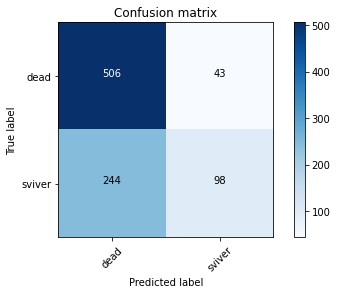

In [15]:
cnf_matrix = confusion_matrix(y, yhat, labels=[0, 1])
np.set_printoptions(precision=2)

print (classification_report(y, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['dead','sviver'],normalize= False,  title='Confusion matrix')

In [16]:
from sklearn.metrics import f1_score
f1_score(y, yhat, average='weighted') 

0.6357878750689273

In [18]:
cnf_matrix = confusion_matrix(y, yhat1, labels=[0, 1])
np.set_printoptions(precision=2)

print (classification_report(y, yhat1))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['dead','sviver'],normalize= False,  title='Confusion matrix')

ValueError: Found input variables with inconsistent numbers of samples: [891, 418]

In [19]:
from sklearn.metrics import f1_score
f1_score(y, yhat1, average='weighted') 

ValueError: Found input variables with inconsistent numbers of samples: [891, 418]

In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    object
 3   Sex          418 non-null    int64 
 4   Age          418 non-null    int64 
 5   SibSp        418 non-null    int64 
 6   Parch        418 non-null    int64 
 7   Ticket       418 non-null    object
 8   Fare         418 non-null    int64 
 9   Cabin        91 non-null     object
 10  Embarked     418 non-null    object
dtypes: int64(7), object(4)
memory usage: 36.0+ KB
